**Overview**

Will be using a Naive Bayes Classifier on Yelp review data, in order to determine if feedback was 'positive' or 'negative'. This will require feature engineering in order to produce the most accurate classifier. 

In [233]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
#Read text file in and assign own headers

yelp_raw = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
yelp_raw.columns = ['Review', 'Positive or Negative']

In [235]:
#Take a look at the data

yelp_raw.head(5)

,Review,Positive or Negative
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [236]:
yelp_raw['Review'].astype(str)

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
5         Now I am getting angry and I want my damn pho.
6                  Honeslty it didn't taste THAT fresh.)
7      The potatoes were like rubber and you could te...
8                              The fries were great too.
9                                         A great touch.
10                              Service was very prompt.
11                                    Would not go back.
12     The cashier had no care what so ever on what I...
13     I tried the Cape Cod ravoli, chicken,with cran...
14     I was disgusted because I was pretty sure that...
15     I was shocked because no signs indicate cash o...
16                                   Highly recommended.
17                Waitress was 

In [237]:
#First, make everything lower case

yelp_raw['Review'] = yelp_raw['Review'].apply(lambda x: str(x).lower())

In [238]:
#Extract all special characters

def GetSpecialChar(x):
    special_characters = []
    for char in x:
        if char.isalpha() == False:
            special_characters.append(char)
    return special_characters

In [239]:
#Create a column in the dataframe with the special characters from each row

yelp_raw['SpecialCharacters'] = yelp_raw['Review'].apply(lambda x : GetSpecialChar(x))

In [240]:
#Now work to get unique list

special_characters = []
for row in yelp_raw['SpecialCharacters']:
    for char in row:
        special_characters.append(char)

In [217]:
#Let's see our list

set(special_characters)

{' ',
 '!',
 '"',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?'}

In [242]:
#Remove special characters from Review column

special_characters_list = [',', '\'', '.', '/', '"', '\'', '*', '-', '&', '%', '$', '(', ')', ':', ';', '?', '!', '+', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


for char in special_characters_list:
    for char in row:
        yelp_raw['Review'] = yelp_raw['Review'].str.replace(char, ' ')

In [243]:
yelp_raw['Review']

0                               wow    loved this place 
1                                     crust is not good 
2              not tasty and the texture was just nasty 
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
5         now i am getting angry and i want my damn pho 
6                  honeslty it didn t taste that fresh )
7      the potatoes were like rubber and you could te...
8                              the fries were great too 
9                                         a great touch 
10                              service was very prompt 
11                                    would not go back 
12     the cashier had no care what so ever on what i...
13     i tried the cape cod ravoli  chicken with cran...
14     i was disgusted because i was pretty sure that...
15     i was shocked because no signs indicate cash o...
16                                   highly recommended 
17                waitress was 

In [131]:
#New column that splits reviews
yelp_raw['ReviewSplit'] = yelp_raw['Review'].apply(lambda x: str(x).split())

In [132]:
#Now get a unique count of each word in all reviews. First create 'counts' variable.

from collections import Counter
counts = yelp_raw.ReviewSplit.map(Counter).sum()

In [133]:
counts.most_common(100)

[('the', 582),
 ('and', 388),
 ('i', 303),
 ('was', 292),
 ('a', 237),
 ('to', 216),
 ('is', 171),
 ('this', 142),
 ('of', 125),
 ('not', 115),
 ('it', 110),
 ('for', 107),
 ('in', 104),
 ('food', 92),
 ('we', 79),
 ('place', 77),
 ('very', 74),
 ('my', 72),
 ('with', 71),
 ('so', 66),
 ('had', 66),
 ('be', 66),
 ('that', 62),
 ('are', 62),
 ('good', 62),
 ('were', 61),
 ('but', 61),
 ('have', 61),
 ('great', 57),
 ('you', 56),
 ('they', 56),
 ('service', 56),
 ('at', 55),
 ('on', 54),
 ('like', 45),
 ('our', 41),
 ('go', 40),
 ('will', 37),
 ('back', 36),
 ('here', 36),
 ('as', 36),
 ('time', 35),
 ('all', 35),
 ('just', 34),
 ('really', 33),
 ('an', 32),
 ('their', 31),
 ('if', 30),
 ('would', 28),
 ('there', 28),
 ('your', 25),
 ('never', 25),
 ("don't", 25),
 ('only', 24),
 ('been', 23),
 ('no', 23),
 ('what', 23),
 ('ever', 23),
 ('also', 23),
 ('best', 23),
 ('good.', 22),
 ('from', 22),
 ('by', 21),
 ('-', 21),
 ('one', 21),
 ('place.', 20),
 ('which', 20),
 ('some', 20),
 ('cam

In [134]:
#Create keywords list to form the basis of our Naive Bayes Classifier

keywords = ['worst', 'slow', 'pricey', 'poor', 'bad', 'rude', 'disappointed', 
            'avoid', 'nasty', 'sick', 'average', 'not', 'terrible', 'wait','but',
            'good', 'like', 'great', 'definitely', 'don\'t', 'recommend', 'didn\'t',
           'love', 'nice', 'friendly', 'better', 'never', 'always', 'still', 'feel',
           'very', 'worth', 'until', 'suggest', 'portions']

for key in keywords:
    yelp_raw[str(key)] = yelp_raw.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False)

**Note:** Since one of the main assumptions of the Naive Bayes Classifier is that the variables are independent of eachother, let's look at a correlation matrix to see if this is the case.

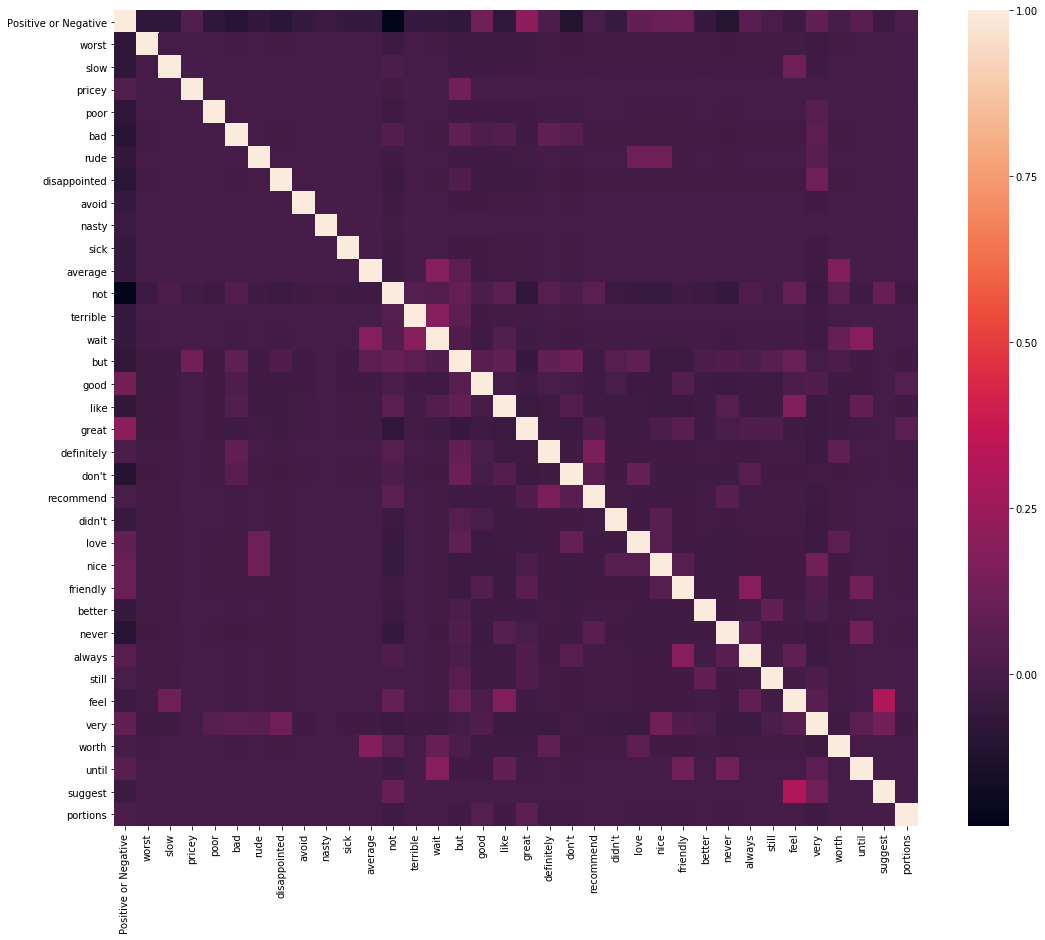

In [135]:
#Correlation matrix with sns.heatmap

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(18, 15))

sns.heatmap(yelp_raw.corr())
plt.show()

This matrix should be good enough. Ideally, we would want no correlation whatsoever. However, although there is some correlation across the board, there is none greater than 0.25 and that should still yield strong results.

In [136]:
#Before we actually run the model we have to build out our training data. Specify an outcome (y or dependent variable) and 
#the inputs (x or independent variables). We'll do that below under the variables data and target

data = yelp_raw[keywords]
target = yelp_raw['Positive or Negative']

In [137]:
#Since data is binary / boolean, need to import the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import RFE

# Instantiate our model and store it in a new variable.
NB_Model = BernoulliNB()

# Fit our model to the data.
NB_Model.fit(data, target)

# Classify, storing the result in a new variable.
positive_predictor = NB_Model.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != positive_predictor).sum()))

Number of mislabeled points out of a total 1000 points : 335


In [138]:
#Confusion matrix to better understand results

from sklearn.metrics import confusion_matrix
confusion_matrix(target, positive_predictor)

array([[213, 287],
       [ 48, 452]])

Top row signifies correctly classifying positive reviews
Bottom row signifies correctly classifying negative reviews

1. Sensitivity is the percentage of positives correctly identified, in our case 287/500 or 57.4%. This shows how good we are at catching positives, or how sensitive our model is to identifying positives.

2. Specificity is just the opposite, the percentage of negatives correctly identified, 452/500 or 90.4%.

Type 1 Error: False Positive (false alarm) - 287
Type 2 Error: False Negative (miss) - 48

### Conducting backward pass to see how important each feature is

In [141]:
yelp_revised = yelp_raw.iloc[:, 3:len(yelp_raw.columns)]

In [142]:
for i in range(len(yelp_revised.columns)):
    #Create two slices and combine them
    first_slice = pd.DataFrame(yelp_revised.iloc[:, 0:i])
    second_slice = pd.DataFrame(yelp_revised.iloc[:, (i+1):len(yelp_revised.columns)])
    subset = pd.concat([first_slice, second_slice], axis=1)
    
    #Train model
    NB_Model = BernoulliNB()
    NB_Model.fit(subset, target)
    positive_predictor = NB_Model.predict(subset)
    
    #Print results for each column
    colnames = yelp_revised.columns[i]
    print("Number of mislabeled points out of a total {} points when dropping {} : {}".format(subset.shape[0], colnames, (target != positive_predictor).sum()))
    print("Accuracy {}".format(100 - ((target != positive_predictor).sum()/subset.shape[0]) * 100)) #I added this so you can view the accuracy as a percentage

Number of mislabeled points out of a total 1000 points when dropping worst : 342
Accuracy 65.8
Number of mislabeled points out of a total 1000 points when dropping slow : 339
Accuracy 66.1
Number of mislabeled points out of a total 1000 points when dropping pricey : 336
Accuracy 66.4
Number of mislabeled points out of a total 1000 points when dropping poor : 340
Accuracy 66.0
Number of mislabeled points out of a total 1000 points when dropping bad : 340
Accuracy 66.0
Number of mislabeled points out of a total 1000 points when dropping rude : 338
Accuracy 66.19999999999999
Number of mislabeled points out of a total 1000 points when dropping disappointed : 342
Accuracy 65.8
Number of mislabeled points out of a total 1000 points when dropping avoid : 338
Accuracy 66.19999999999999
Number of mislabeled points out of a total 1000 points when dropping nasty : 336
Accuracy 66.4
Number of mislabeled points out of a total 1000 points when dropping sick : 338
Accuracy 66.19999999999999
Number of

### Using Recursive Feature Selection to Rank Features

In [121]:
# Pass any estimator to the RFE constructor
selector = RFE(NB_Model)
selector = selector.fit(data, target)

In [122]:
print(selector.ranking_)

[ 1  1  1  1  1  1  1  1  1  1  1 14  1  1 16 19 12 17  9  1  7  4 11 13
 15  1  2 10  8  5 18  6  1  1  3]


In [123]:
#Now turn into a dataframe so you can sort by rank
rankings = pd.DataFrame({'Features': data.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
0,worst,1
25,better,1
13,wait,1
12,terrible,1
32,until,1
10,average,1
9,sick,1
19,don't,1
8,nasty,1
6,disappointed,1


### Applying same model to IMDB data

In [ ]:
#Try the same model on another dataset - IMDB

imdb_raw = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
imdb_raw.columns = ['Review', 'Positive or Negative']

In [ ]:
#Use same as before
#Create keywords list to form the basis of our Naive Bayes Classifier

keywords = ['worst', 'slow', 'pricey', 'poor', 'bad', 'rude', 'disappointed', 
            'avoid', 'nasty', 'sick', 'average', 'not', 'terrible', 'wait','but',
            'good', 'like', 'great', 'definitely', 'don\'t', 'recommend', 'didn\'t',
           'love', 'nice', 'friendly', 'better', 'never', 'always', 'still', 'feel',
           'very', 'worth', 'until', 'suggest', 'portions']

for key in keywords:
    imdb_raw[str(key)] = imdb_raw.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False)

In [ ]:
#Setup data and target

data_imdb = imdb_raw[keywords]
target_imdb = imdb_raw['Positive or Negative']

In [ ]:
# Instantiate our model and store it in a new variable.
NB_Model_imdb = BernoulliNB()

# Fit our model to the data.
NB_Model_imdb.fit(data_imdb, target_imdb)

# Classify, storing the result in a new variable.
positive_predictor_imdb = NB_Model_imdb.predict(data_imdb)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_imdb.shape[0],
    (target_imdb != positive_predictor_imdb).sum()))

**Takeaway:** Did not perform as well as it did with the Yelp review data. This makes sense as some of the adjectives in my previous model were more closely related to food than to movies.